
Training Naive Bayes...

Naive Bayes Results:
Accuracy: 0.61
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.69      0.68        61
           1       0.50      0.49      0.49        39

    accuracy                           0.61       100
   macro avg       0.59      0.59      0.59       100
weighted avg       0.61      0.61      0.61       100

Confusion Matrix:
[[42 19]
 [20 19]]

Training Random Forest...

Random Forest Results:
Accuracy: 0.49
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.59      0.59        61
           1       0.34      0.33      0.34        39

    accuracy                           0.49       100
   macro avg       0.46      0.46      0.46       100
weighted avg       0.49      0.49      0.49       100

Confusion Matrix:
[[36 25]
 [26 13]]

Training KNN...

KNN Results:
Accuracy: 0.52
Classification Report:
              precision    re

D:\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.59      0.56      0.57        61
           1       0.36      0.38      0.37        39

    accuracy                           0.49       100
   macro avg       0.47      0.47      0.47       100
weighted avg       0.50      0.49      0.49       100

Confusion Matrix:
[[34 27]
 [24 15]]


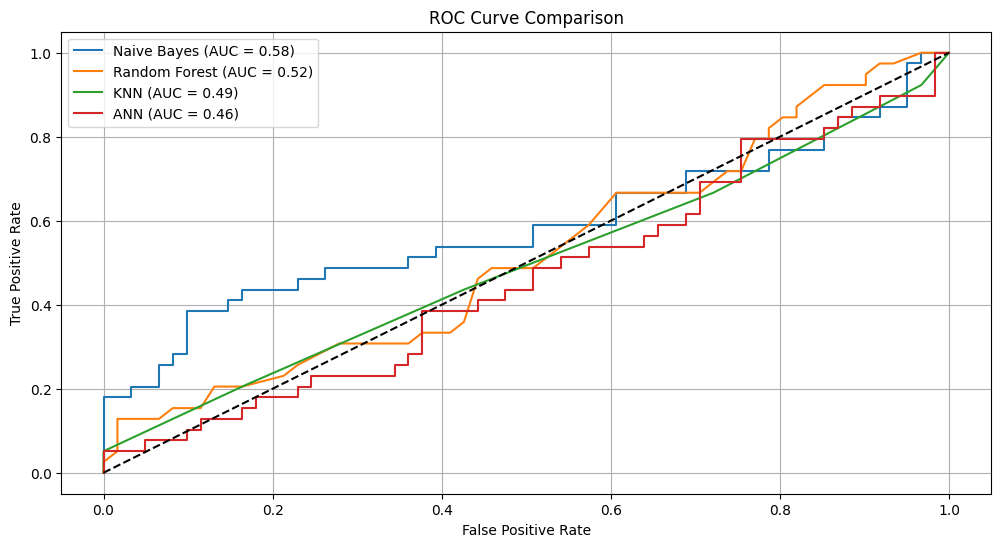

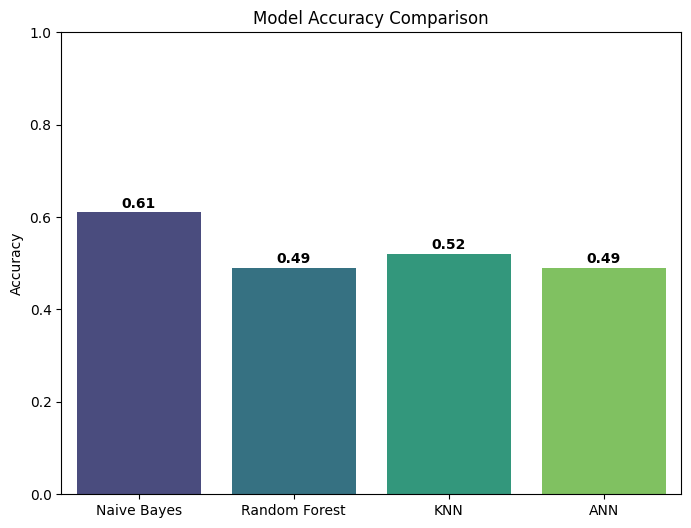


✅ Best Performing Model: Naive Bayes with Accuracy = 0.6100


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16644\2813096521.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='crest')


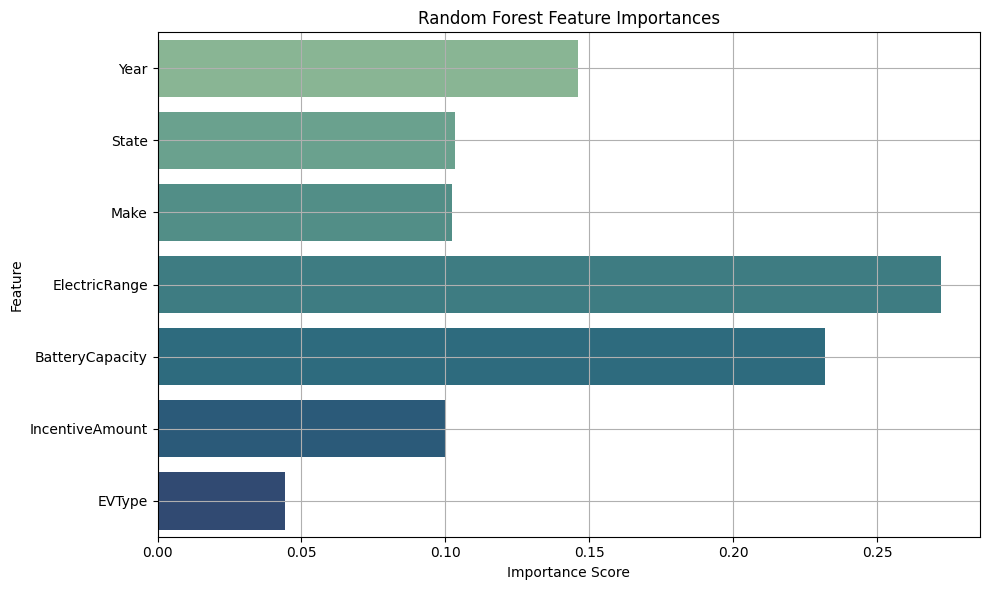

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

# Simulated EV dataset
np.random.seed(42)
data = pd.DataFrame({
    'Year': np.random.choice(range(2015, 2023), 500),
    'State': np.random.choice(['CA', 'NY', 'TX', 'WA', 'FL'], 500),
    'Make': np.random.choice(['Tesla', 'Nissan', 'Chevy', 'Ford', 'BMW'], 500),
    'ElectricRange': np.random.normal(250, 50, 500).astype(int),
    'BatteryCapacity': np.random.normal(60, 10, 500).astype(int),
    'IncentiveAmount': np.random.choice([0, 1500, 2500, 5000], 500),
    'EVType': np.random.choice(['BEV', 'PHEV'], 500),
    'Adopted': np.random.choice([0, 1], 500)
})

# Encoding categorical columns
le_state = LabelEncoder()
le_make = LabelEncoder()
le_evtype = LabelEncoder()
data['State'] = le_state.fit_transform(data['State'])
data['Make'] = le_make.fit_transform(data['Make'])
data['EVType'] = le_evtype.fit_transform(data['EVType'])

# Features and Target
X = data.drop('Adopted', axis=1)
y = data['Adopted']

# Split and Scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
models = {
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'ANN': MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42, verbose=True)
}

# Store results
acc_values = []
model_names = []
y_preds = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_preds[name] = y_pred
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)
    model_names.append(name)

    print(f"\n{name} Results:")
    print("Accuracy:", round(acc, 4))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# ROC Curves
plt.figure(figsize=(12, 6))
for name, y_pred in y_preds.items():
    if hasattr(models[name], "predict_proba"):
        y_score = models[name].predict_proba(X_test_scaled)[:, 1]
    else:
        y_score = models[name].decision_function(X_test_scaled)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy Comparison Bar Chart
plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=acc_values, hue=model_names, palette='viridis', legend=False)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, acc in enumerate(acc_values):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontweight='bold')
plt.show()

# Identify best model
best_index = np.argmax(acc_values)
best_model_name = model_names[best_index]
best_accuracy = acc_values[best_index]
print(f"\n✅ Best Performing Model: {best_model_name} with Accuracy = {best_accuracy:.4f}")

# Feature Importance Plot (only for Random Forest)
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette='crest')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()
